# Plots of the distances travelled by the particles as a function of their initial position

*Author: Miriam Sterl*

We plot the total distances travelled by the particles during the simulation, as a function of their initial position. We do this for the FES, the GC and the GC+FES run.

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

In [ ]:
File0 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingFES.nc'
dataset1 = Dataset(File1)
lat1 = dataset1.variables['lat'][:]
lon1 = dataset1.variables['lon'][:]
time1 = dataset1.variables['time'][:]
dist1 = dataset1.variables['distance'][:]
lon1[lon1>180]-=360
lon1[lon1<-180]+=360

File1 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingGC.nc'
dataset2 = Dataset(File2)
lat2 = dataset2.variables['lat'][:]
lon2 = dataset2.variables['lon'][:]
time2 = dataset2.variables['time'][:]
dist2 = dataset2.variables['distance'][:]
lon2[lon2>180]-=360
lon2[lon2<-180]+=360

File2 = '/science/projects/oceanparcels/output_data/data_Miriam/Results_TrackingGCFES.nc'
dataset3 = Dataset(File3)
lat3 = dataset3.variables['lat'][:]
lon3 = dataset3.variables['lon'][:]
time3 = dataset3.variables['time'][:]
dist3 = dataset3.variables['distance'][:]
lon3[lon3>180]-=360
lon3[lon3<-180]+=360

In [ ]:
# Initial longitudes and latitudes (on 2002-01-01)
startLons = [lon1[:,0], lon2[:,0], lon3[:,0]]
startLats = [lat1[:,0], lat2[:,0], lat3[:,0]]

# Distance travelled by the particles between 2002-01-01 and 2015-01-01
finalDist1 = [dist1[:,45], dist2[:,45], dist3[:,45]]
finalDist2 = [dist1[:,182], dist2[:,182], dist3[:,182]] 
finalDist3 = [dist1[:,-1], dist2[:,-1], dist3[:,-1]]

titles = ['(a) FES run', '(b) GC run', '(c) GC+FES run']

In [5]:
def DistancePlot(lons, lats, dist, fig, ax, vmin, vmax, titlenr, titlesize, labelnr, labelsize, colormap):
    """
    Function that plots the total distance travelled by particles during a certain period as a function of their initial position
    """  
    minLat = np.min(np.round(lats)) # the minimal (rounded) latitude
    maxLat = np.max(np.round(lats)) # the maximal (rounded) latitude
    minLon = np.min(np.round(lons)) # the minimal (rounded) longitude
    maxLon = np.max(np.round(lons)) # the maximal (rounded) longitude

    allLats = np.arange(minLat, maxLat+1) # the latitudinal grid
    allLons = np.arange(minLon, maxLon+1) # the longitudinal grid
    
    distances = np.zeros((len(allLons), len(allLats)))
    for i in range(len(dist)):
        distances[int(np.round(lons[i]-minLon)), int(np.round(lats[i]-minLat))] = dist[i]
            # shift by minLon, minLat to get positive indices
    maskedDist = np.ma.masked_where(distances==0.0, distances) # mask land points
    
    Lat, Lon = np.meshgrid(allLats, allLons)
    distplot = ax.pcolormesh(Lon, Lat, maskedDist/1e4, cmap = colormap, vmin=vmin, vmax=vmax)
    ax.set_title(titles[titlenr], fontsize=titlesize,fontweight='bold')
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor=(0.6,0.6,0.6))
    ax.set_xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
    ax.set_xticklabels([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], fontsize=labelsize)
    ax.set_yticks([-90, -60, - 30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_yticklabels([-90, -60, - 30, 0, 30, 60, 90], fontsize=labelsize)
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid(linewidth=2, color='black', alpha=0.25, linestyle=':')
    
    return distplot

C:\Users\miria\Anaconda3\envs\py2_parcels_M\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Warning: converting a masked element to nan.
  from ipykernel import kernelapp as app
C:\Users\miria\Anaconda3\envs\py2_parcels_M\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


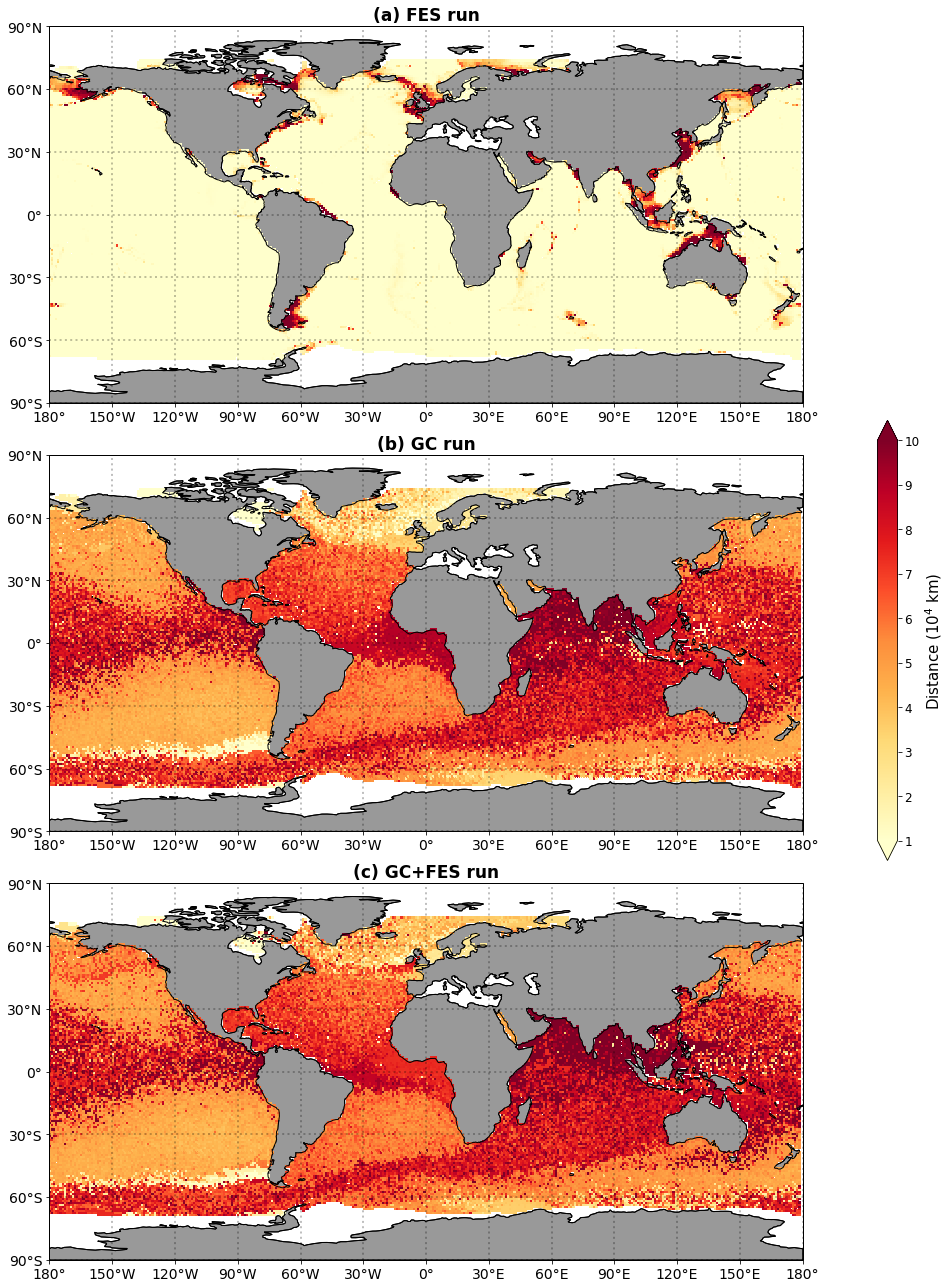

In [7]:
# Compare the three different runs after 13 years

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(38,18), subplot_kw={'projection': ccrs.PlateCarree()})
i=0
for ax in axes.flat:
    distance = DistancePlot(startLons[i], startLats[i], finalDist3[i], fig, ax, 
                            vmin=1, vmax=10, titlenr = i, titlesize=17, labelnr = 0, labelsize=14, colormap='YlOrRd')
    i = i+1
cbar = fig.colorbar(distance, ax=axes.ravel().tolist(), shrink=0.45, extend='both', anchor=(2.2,0.5))
cbar.set_label("Distance ($10^{4}$ km)", rotation=90, fontsize=15)
cbar.ax.tick_params(labelsize=12)
plt.tight_layout()
#plt.savefig('DistanceComparison', bbox_inches='tight')